In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [8]:
test_set_x_orig.shape

(50, 64, 64, 3)

y = [1], it's a 'cat' picture.


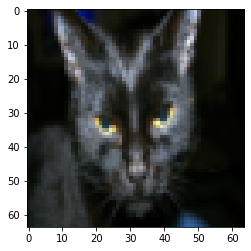

In [17]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [21]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [22]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [20]:
# standardize our dataset.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

### General Architecture of the learning algorithm

![title](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/LogReg_kiank.png)

## Objectives

[Tutorial](https://gogul.dev/software/neural-nets-logistic-regression)

- How to convert an image into a vector?
- How to preprocess an existing image dataset to do Deep Learning?
- How to represent images and labels as numpy arrays?
- How to use just one for-loop to train a logistic regression model?


In [49]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [50]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [51]:
# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [52]:
# standardize our dataset.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [ ]:
# standardize our dataset.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

---

In [ ]:
# sigmoid
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [60]:
w = np.array([1,2,3])
x = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [65]:
w.reshape(x.shape[0],1)

array([[1],
       [2],
       [3]])

In [61]:
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [112]:
# ------------------------- Logistic Regression Neural Network ----------------

class LogisticRegressionNN(object):
    """
    Logistic Regression Neural Network
    """

    def __init__(self, lr=0.01, epochs=2000, threshold=0.5):
        self.lr = lr
        self.epochs = epochs
        self.threshold = threshold
        self.costs_ = []
        self.w_ = None
        self.b_ = None

    def fit(self, X, Y):
        """Fit the model to data matrix X and target(s) y.
        Parameters
        ----------
        X : array-like or sparse matrix, shape (n_samples, n_features)
            The input data.
        Y : array-like, shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels in classification, real numbers in
            regression).
        Returns
        -------
        self : returns a trained LR model.
        """
        self._init_params(X.shape[0])
        self._optimize(X, Y)
        Y_pred = self.predict(X)
        print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred - Y)) * 100))

        return self

    def metrics(self, X_test, Y_test, metric='accuracy'):
        """
        Model metrics
        """
        Y_pred = self.predict(X_test)
        print("Test accuracy : {} %".format(100 - np.mean(np.abs(Y_pred - Y_test)) * 100))

        return self

    def predict(self, X):
        """Predict using the LRNN classifier
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
             The input data.
        Returns
        -------
        y : array-like, shape (n_samples,) or (n_samples, n_classes)
            The predicted classes.
        """
        m = X.shape[1]
        Y_predict = np.zeros((1, m))
        self.w_ = self.w_.reshape(X.shape[0], 1)

        A = self._sigmoid(np.dot(self.w_.T, X) + self.b_)

        for i in range(A.shape[1]):
            if A[0, i] <= self.threshold:
                Y_predict[0, i] = 0
            else:
                Y_predict[0, i] = 1

        return Y_predict

    def predict_one(self, X):
        Y_predict = None
        self.w_ = self.w_.reshape(X.shape[0], 1)
        A = self._sigmoid(np.dot(self.w_.T, X) + self.b_)
        for i in range(A.shape[1]):
            if A[0, i] <= self.threshold:
                Y_predict = 0
            else:
                Y_predict = 1

        return Y_predict

    # ------------------------------ Local methods ----------------------------
    def _init_params(self, dimension):
        """
        Parameter initialization
        """
        self.w_ = np.zeros((dimension, 1))
        self.b_ = 0

    @staticmethod
    def _sigmoid(z):
        """
        Sigmoid function
        """
        return 1 / (1 + np.exp(-z))

    def _propagate(self, X, Y):
        """
        Forward and back propagation
        """

        # num of training samples
        m = X.shape[1]

        # forward pass
        A = self._sigmoid(np.dot(self.w_.T, X) + self.b_)
        cost = (-1 / m) * (np.sum(np.multiply(Y, np.log(A)) + np.multiply((1 - Y), np.log(1 - A))))

        # back propagation
        dw = (1 / m) * (np.dot(X, (A - Y).T))
        db = (1 / m) * (np.sum(A - Y))

        cost = np.squeeze(cost)

        # gradient dictionary
        grads = {"dw": dw, "db": db}

        return grads, cost

    def _optimize(self, X, Y):
        """
        Optimization using gradient descent
        """
        self.costs_ = []
        for i in range(self.epochs):
            # calculate gradients
            grads, cost = self._propagate(X, Y)

            # get gradients
            dw = grads["dw"]
            db = grads["db"]

            # update rule
            self.w_ = self.w_ - (self.lr * dw)
            self.b_ = self.b_ - (self.lr * db)

            if i % 100 == 0:
                self.costs_.append(cost)
                print("Cost after %i epochs: %f" % (i, cost))

        # gradient dict
        grads = {"dw": dw, "db": db}

        return grads

    # ------------------------- END Logistic Regression Neural Network --------


In [113]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

    classes = np.array(test_dataset["list_classes"][:])  # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [114]:
X, y, X_test, y_test, classes = load_dataset()
# Reshape the training and test examples
X_flatten = X.reshape(X.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
# Standardize dataset.
X = X_flatten / 255.
X_test = X_test_flatten / 255.

In [115]:
# Train model
model = LogisticRegressionNN()
model.fit(X, y)
model.metrics(X_test, y_test)

Cost after 0 epochs: 0.693147
Cost after 100 epochs: 0.823921
Cost after 200 epochs: 0.418944
Cost after 300 epochs: 0.617350
Cost after 400 epochs: 0.522116
Cost after 500 epochs: 0.387709
Cost after 600 epochs: 0.236254
Cost after 700 epochs: 0.154222
Cost after 800 epochs: 0.135328
Cost after 900 epochs: 0.124971
Cost after 1000 epochs: 0.116478
Cost after 1100 epochs: 0.109193
Cost after 1200 epochs: 0.102804
Cost after 1300 epochs: 0.097130
Cost after 1400 epochs: 0.092043
Cost after 1500 epochs: 0.087453
Cost after 1600 epochs: 0.083286
Cost after 1700 epochs: 0.079487
Cost after 1800 epochs: 0.076007
Cost after 1900 epochs: 0.072809
Train accuracy: 99.52153110047847 %
Test accuracy : 70.0 %


In [116]:
index = 5
pic = X_test[:, 0]

In [117]:
pic.shape

(12288,)

In [118]:
pred = model.predict_one(pic)

IndexError: tuple index out of range

---

In [10]:
n = 4
ad = np.random.randint(2,6,(n,n))

In [6]:
ad

array([[1, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 0]])

In [88]:
np.random.randint(1, 8)

2

array([[0.44143046, 0.55856954]])

In [193]:
np.random.dirichlet((10, 5, 3), 20).transpose()

array([[0.50310965, 0.56005222, 0.70354694, 0.27207893, 0.59098884,
        0.35246786, 0.43575899, 0.58350934, 0.57922131, 0.43221922,
        0.69837664, 0.66175877, 0.74909674, 0.67388586, 0.65467404,
        0.55307137, 0.58185998, 0.62421119, 0.59691343, 0.5813162 ],
       [0.30189525, 0.31676009, 0.18058403, 0.32469722, 0.36103966,
        0.33121021, 0.16356781, 0.27629958, 0.29136316, 0.35562642,
        0.24205219, 0.24214003, 0.12274526, 0.18714158, 0.21220794,
        0.30070463, 0.34420636, 0.33468346, 0.22600325, 0.32149472],
       [0.19499511, 0.12318769, 0.11586903, 0.40322385, 0.04797151,
        0.31632192, 0.4006732 , 0.14019108, 0.12941553, 0.21215436,
        0.05957118, 0.0961012 , 0.128158  , 0.13897256, 0.13311801,
        0.146224  , 0.07393366, 0.04110536, 0.17708333, 0.09718908]])